In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris= load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names[1]

'versicolor'

In [9]:
x= iris.data
y= iris.target

df= pd.DataFrame(x, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
new_df= df.copy()
new_df['class']= y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


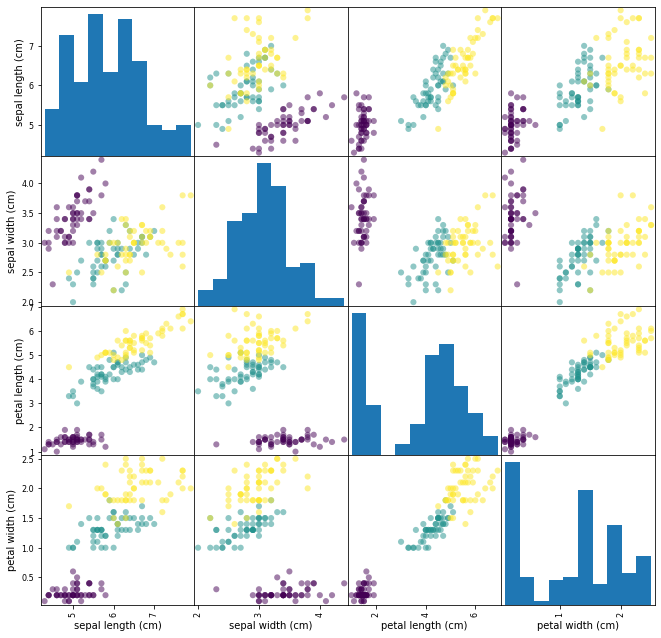

In [11]:
matrix_scatter= pd.plotting.scatter_matrix(df, c=y, figsize= [11,11], s=150)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(x , y, test_size = 0.2, random_state = 1, stratify = y)

In [13]:
dt= DecisionTreeClassifier(max_depth=2, random_state= 1) # model decision tree
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

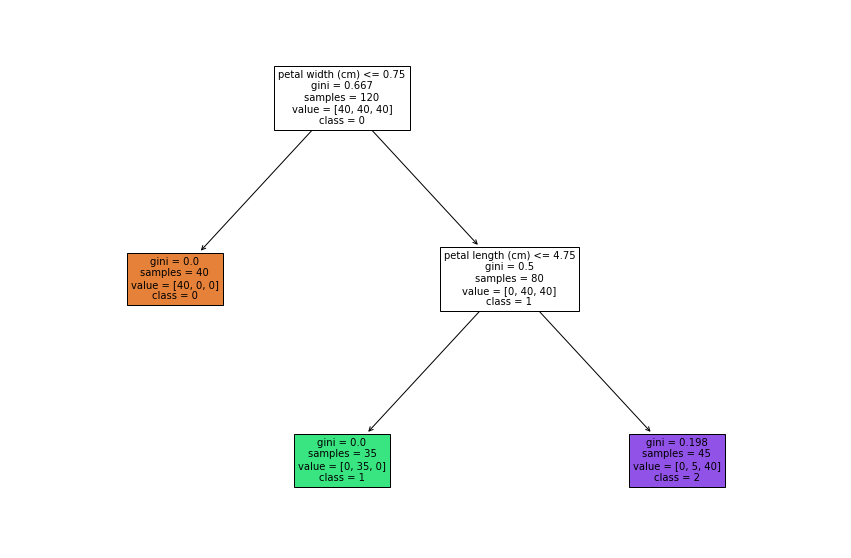

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names= df.columns, class_names=['0','1','2'], filled=True, fontsize= 10)
plt.show()

In [15]:
from sklearn.metrics import classification_report

In [16]:
dt_pred_train = dt.predict(X_train)
print('DT train \n', classification_report(y_train, dt_pred_train))

DT train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.88      0.93        40
           2       0.89      1.00      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [17]:
dt_pred_val = dt.predict(X_test)
print('DT val \n', classification_report(y_test, dt_pred_val))

DT val 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Hyperparameter tuning

In [18]:
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_depth': np.arange(2,8)
}

dt_grid= GridSearchCV(dt, param_grid= params, cv= 5, scoring= 'accuracy', return_train_score=True)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_split': [2, 4, 6, 8, 10]},
             return_train_score=True, scoring='accuracy')

In [19]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

In [20]:
dt_grid.best_score_

0.95

In [21]:
dt_best= dt_grid.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [22]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

print('DT train \n', classification_report(y_train, dt_train_p))
print('DT val \n', classification_report(y_test, dt_val_p))

DT train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        40
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

DT val 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
pd.DataFrame({
    'Actual': y_test,
    'Prediction': dt_val_p
})

,Actual,Prediction
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


In [24]:
# Boston

import pandas as pd
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()
print('Dataset structure= ', dir(boston))

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

df.sample(5)

#Lets create feature matrix X  and y labels
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 1)
dtr.fit(X_train ,y_train)

dtr.score(X_test, y_test)

dtr.score(X_train, y_train)

from sklearn.metrics import mean_squared_error 
y_pred = dtr.predict(X_test)
mean_squared_error(y_test, y_pred)

y_pred_train = dtr.predict(X_train)
mean_squared_error(y_train, y_pred_train)

from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["absolute_error"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtr, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

print("Best Score:{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters:\n{}".format(grid_cv_dtm.best_params_))

best_dtm = grid_cv_dtm.best_estimator_
best_dtm.score(X_test, y_test)

best_dtm.score(X_train, y_train)

y_pred_test2 = best_dtm.predict(X_test)
mean_squared_error(y_test, y_pred_test2)

y_pred_train2 = best_dtm.predict(X_train)
mean_squared_error(y_train, y_pred_train2)

X_train.head(2)

new_data = [[0.15, 25 ,5.13, 0.0, 0.453, 6.145, 29.2, 7.8148, 8.0, 284, 19.7, 390.6, 6.86]]

best_dtm.predict(new_data)

y_pred_test2

y_test

predicted_price= pd.DataFrame(best_dtm.predict(X_test), columns=['Predicted Price'])
actual_price = pd.DataFrame(y_test, columns=['target'])
actual_price = actual_price.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual_price,predicted_price],axis =1)
df_actual_vs_predicted.T

# pd.DataFrame({
#     "Actual": y_test,
#     "Prediction": y_pred_test2
# })

Dataset structure=  ['DESCR', 'data', 'feature_names', 'filename', 'target']
X shape= (506, 13)
y shape= (506, 1)
X_train dimension=  (404, 13)
X_test dimension=  (102, 13)
y_train dimension=  (404, 1)
y_train dimension=  (102, 1)


C:\Users\dedwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dedwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dedwi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\dedwi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 351, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'absolute_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dedwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

KeyError: 'absolute_error'